# 🎰Multi-Arm Bandit (MAB):

Machine Learning framework in which an agent has to select actions (arms) in order to maximize its cumulative reward in the long term.

# Our Challenge:

Imagine we have few different slot machines in the casino and                                                    we are going to build a algorithm to help us to pull the arms of the slot machines,                              in order to maximise the rewards.

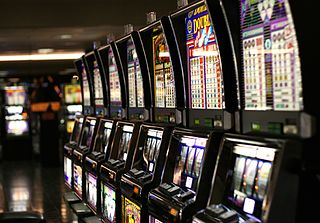

# Exploration vs Exploitation

Exploration allows an agent to improve its current knowledge about each action, hopefully leading to long-term benefit. Improving the accuracy of the estimated action-values, enables an agent to make more informed decisions in the future.

Exploitation on the other hand, chooses the greedy action to get the most reward by exploiting the agent’s current action-value estimates. But by being greedy with respect to action-value estimates, may not actually get the most reward and lead to sub-optimal behaviour.
When an agent explores, it gets more accurate estimates of action-values. And when it exploits, it might get more reward. It cannot, however, choose to do both simultaneously, which is also called the exploration-exploitation dilemma.

# Policy Improvement: Choosing the Best Action

The process of making a new policy that improves on an original policy, 

by making it greedy with respect to the value function of the original policy, 

is called policy improvement

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from scipy.stats import norm

In [7]:
# Helper function to display the results
def plot_dis(bandits):
    x = np.linspace(0, 1, 200)
    fig, ax = plt.subplots(figsize=(10, 5))
    for b in bandits:
        plt.plot(x, norm.pdf(x, b.predicted_mean, (1/b.tau) ** .5))

    plt.ylabel('PDF')
    plt.legend([f'{b.true_mean}' for b in bandits])
    plt.show()

# Epsilon Greedy

Epsilon-Greedy is a simple method to balance exploration and exploitation by choosing between exploration and exploitation randomly.

The epsilon-greedy, where epsilon refers to the probability of choosing to explore, exploits most of the time with a small chance of exploring.

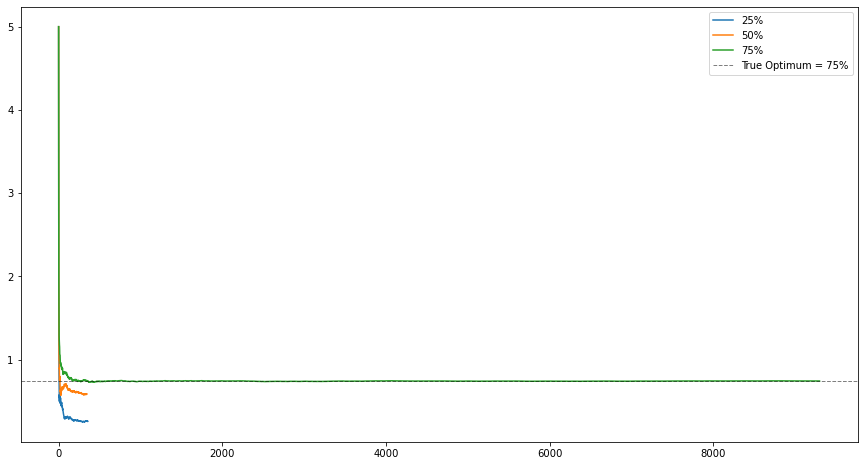

%Win of bandit_25 = 0.26%
%Win of bandit_50 = 0.59%
%Win of bandit_75 = 0.74%


In [49]:
class bandit:
    def __init__(self, input_win_rate):
        self.input_win_rate = input_win_rate
        self.n_pulls = 1
        self.wins = 5
        self.p_estimate = 0
        self.p_estimate_log = [5]
    
    def pull(self):
        self.n_pulls += 1 
        if self.input_win_rate >= np.random.random():
            self.wins += 1
        
        self.p_estimate = self.wins/self.n_pulls
        self.p_estimate_log.append(self.p_estimate)
        
def experiment(epsilon=.1, rand_init=True):
    # set bandits with .25, .5 .75 win%
    bandit_25 = bandit(.25)
    bandit_50 = bandit(.5)
    bandit_75 = bandit(.75)
    
    bandits = [bandit_25, bandit_50, bandit_75]
    if rand_init == True:
        # randomly initiate a bandit
        while True:
            rand_init_bandit = np.random.choice(bandits)
            rand_init_bandit.pull()

            if sum([b.p_estimate for b in bandits]) > 0:
                break
    
    if rand_init == False:
        for j in range(100):
            for b in bandits:
                b.pull()

    for i in range(10000):
        if epsilon < np.random.random():
            max_id = np.argmax([b.p_estimate for b in bandits])
            bandits[max_id].pull()

        else:
            rand_id = np.random.choice([0, 1, 2])
            bandits[rand_id].pull()

    fig, ax = plt.subplots(figsize=(15, 8))
    plt.plot([i for i in range(1, bandits[0].n_pulls + 1)], bandits[0].p_estimate_log)
    plt.plot([i for i in range(1, bandits[1].n_pulls + 1)], bandits[1].p_estimate_log)
    plt.plot([i for i in range(1, bandits[2].n_pulls + 1)], bandits[2].p_estimate_log)
    plt.axhline(.75, color='black', linestyle='--', linewidth=1, alpha=.5)
    plt.legend(['25%', '50%', '75%', 'True Optimum = 75%'])
    plt.show()

    print(f'%Win of bandit_25 = {round(bandits[0].p_estimate, 2)}%')
    print(f'%Win of bandit_50 = {round(bandits[1].p_estimate, 2)}%')
    print(f'%Win of bandit_75 = {round(bandits[2].p_estimate, 2)}%')
    
# epsilon-greedy
experiment(epsilon=.1, rand_init=True)

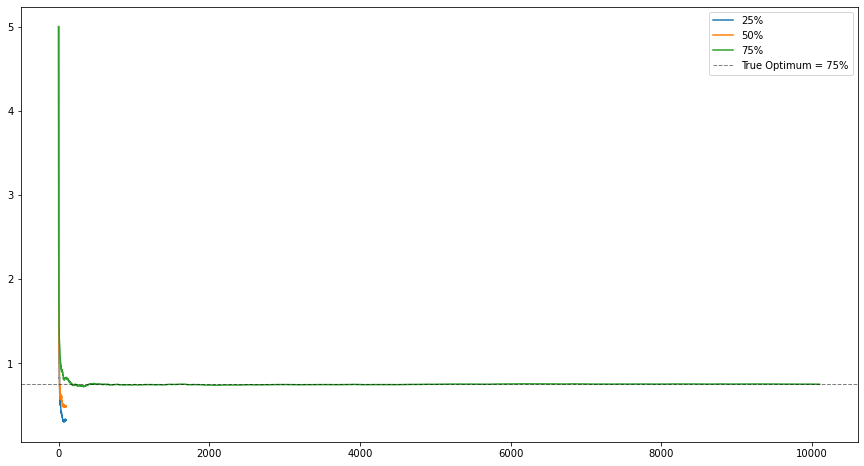

%Win of bandit_25 = 0.33%
%Win of bandit_50 = 0.49%
%Win of bandit_75 = 0.75%


In [50]:
# Optimistic - set the initial values high, so that the true optimum will 'catch up'
experiment(epsilon=0, rand_init=False)

# Upper Confidence Bound

Upper-Confidence Bound action selection uses uncertainty in the action-value estimates for balancing exploration and exploitation. 

Since there is inherent uncertainty in the accuracy of the action-value estimates when we use a sampled set of rewards thus UCB uses uncertainty in the estimates to drive exploration.

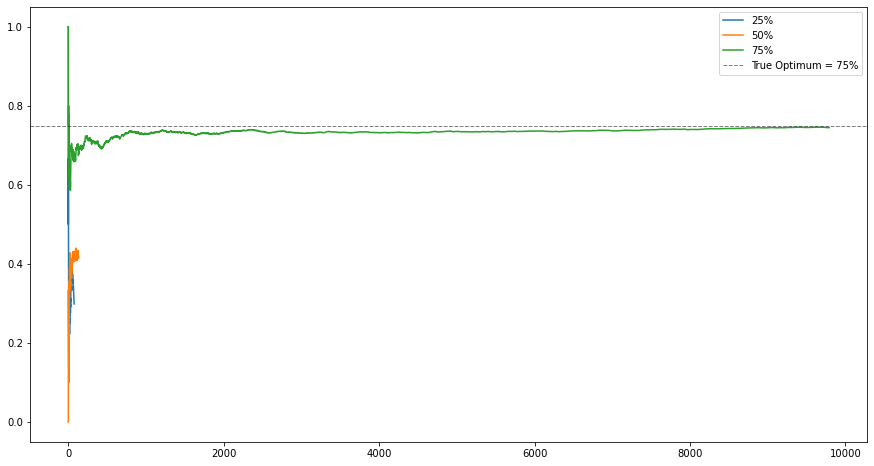

%Win of bandit_25 = 0.3%
%Win of bandit_50 = 0.41%
%Win of bandit_75 = 0.74%


In [51]:
class bandit:
    def __init__(self, input_win_rate):
        self.input_win_rate = input_win_rate
        self.n_pulls = 0
        self.wins = 0
        self.p_estimate = 0
        self.p_estimate_log = []
    
    def pull(self):
        self.n_pulls += 1 
        if self.input_win_rate >= np.random.random():
            self.wins += 1
        
        self.p_estimate = self.wins/self.n_pulls
        self.p_estimate_log.append(self.p_estimate)
        
def ucb(mean, n, nj):
    # n = plays so far 
    # nj = number of times machine j have been played so far
    return mean + np.sqrt(2 * np.log(n) / nj)

def experiment_ucb():
    # set bandits with .25, .5 .75 win%
    bandit_25 = bandit(.25)
    bandit_50 = bandit(.5)
    bandit_75 = bandit(.75)
    
    bandits = [bandit_25, bandit_50, bandit_75]
    for b in bandits:
        b.pull()
    
    N = 3
    for i in range(10000 - 3):
        N += 1
        ucb_id = np.argmax([ucb(b.p_estimate, N, len(b.p_estimate_log)) for b in bandits])
        bandits[ucb_id].pull()

    fig, ax = plt.subplots(figsize=(15, 8))
    plt.plot([i for i in range(1, bandits[0].n_pulls + 1)], bandits[0].p_estimate_log)
    plt.plot([i for i in range(1, bandits[1].n_pulls + 1)], bandits[1].p_estimate_log)
    plt.plot([i for i in range(1, bandits[2].n_pulls + 1)], bandits[2].p_estimate_log)
    plt.axhline(.75, color='black', linestyle='--', linewidth=1, alpha=.5)
    plt.legend(['25%', '50%', '75%', 'True Optimum = 75%'])
    plt.show()

    print(f'%Win of bandit_25 = {round(bandits[0].p_estimate, 2)}%')
    print(f'%Win of bandit_50 = {round(bandits[1].p_estimate, 2)}%')
    print(f'%Win of bandit_75 = {round(bandits[2].p_estimate, 2)}%')
    
experiment_ucb()

# Bayesian Bandit

Simply speaking, what Bayesian algorithm does is that it uses the know information (prior) to determine the next action (Exploration vs Exploitation).

In [48]:
# Bayesian Bandit Pseudo Code
# 1) beta-sampling with all the bandits
# 2) pick the best bandit
# 3) pull the best bandit
# 4) update the bandit's alpha, beta with:
#    alpha += reward
#    beta += 1 - reward

# where reward = 0 or 1

# repeat 1) 

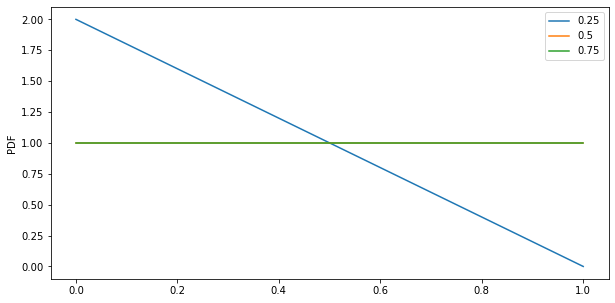

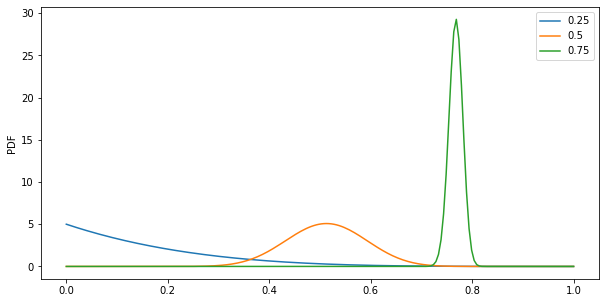

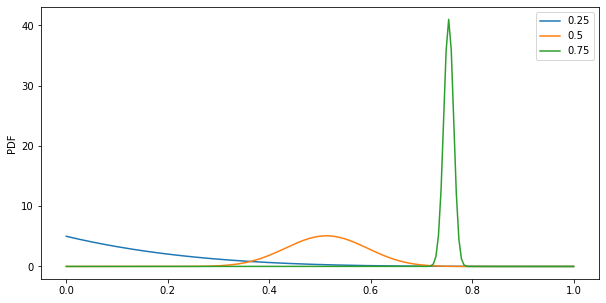

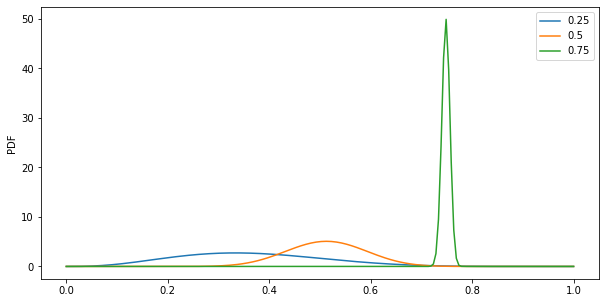

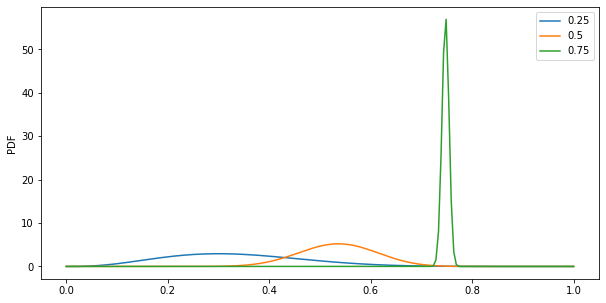

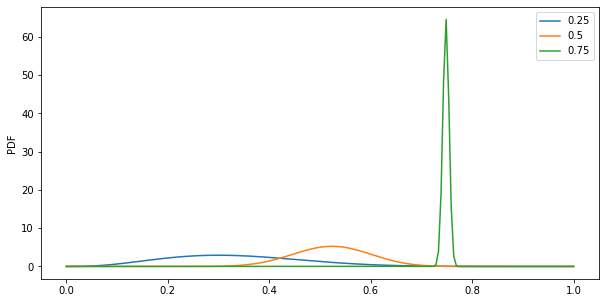

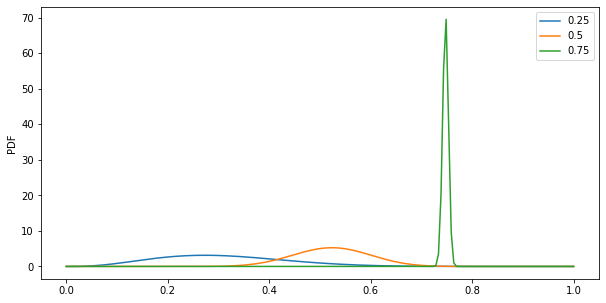

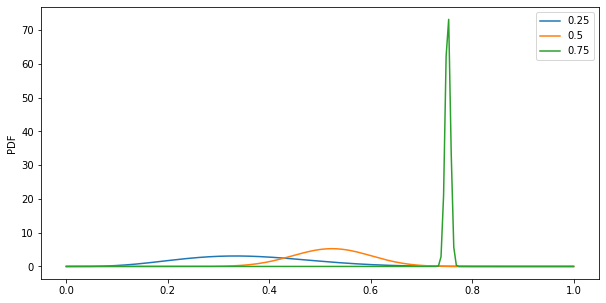

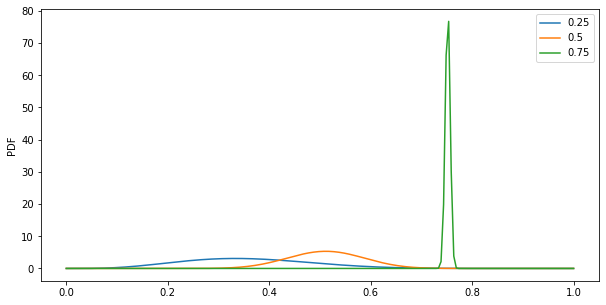

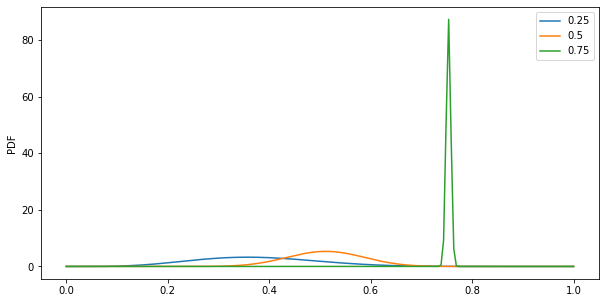

In [20]:
class bayesian_bandit:
    def __init__(self, p):
        self.p = p
        self.p_estimate = 0
        self.a = 1
        self.b = 1
        self.N = 0
        self.win = 0
    
    def pull(self):
        self.N += 1
        self.x = (np.random.random() < self.p)
        self.win += self.x
        return self.x
        
    def sample(self):
        return np.random.beta(self.a, self.b)
    
    def update(self):
        self.a += self.x
        self.b += 1 - self.x
        self.p_estimate = self.win/self.N
        
def plot_dis(bandits):
    x = np.linspace(0, 1, 200)
    fig, ax = plt.subplots(figsize=(10, 5))
    for b in bandits:
        plt.plot(x, beta.pdf(x, b.a, b.b))

    plt.ylabel('PDF')
    plt.legend([f'{b.p}' for b in bandits])
    plt.show()
    
bandits = [bayesian_bandit(.25), bayesian_bandit(.5), bayesian_bandit(.75)]
for i in range(10000):
    j = np.argmax([b.sample() for b in bandits])
    bandits[j].pull()
    bandits[j].update()
    if i%1000 == 0:
        plot_dis(bandits)